# Huffman coding

C:\Users\snehi\AppData\Local\Temp\ipykernel_21468\1116214852.py:39: RuntimeWarning: overflow encountered in scalar add
  newNode = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)


╒══════════╤═══════════════╤════════════════════╕
│   Symbol │   Probability │       Huffman Code │
╞══════════╪═══════════════╪════════════════════╡
│      169 │   0.00490189  │           11100001 │
├──────────┼───────────────┼────────────────────┤
│      168 │   0.00502014  │           11101010 │
├──────────┼───────────────┼────────────────────┤
│      167 │   0.0110168   │            1111111 │
├──────────┼───────────────┼────────────────────┤
│      164 │   0.0159225   │             100010 │
├──────────┼───────────────┼────────────────────┤
│      170 │   0.00847626  │            1010010 │
├──────────┼───────────────┼────────────────────┤
│      163 │   0.00868988  │            1010111 │
├──────────┼───────────────┼────────────────────┤
│      166 │   0.00659561  │            0100010 │
├──────────┼───────────────┼────────────────────┤
│      162 │   0.00847244  │            1010000 │
├──────────┼───────────────┼────────────────────┤
│      161 │   0.00897217  │            1011111 │


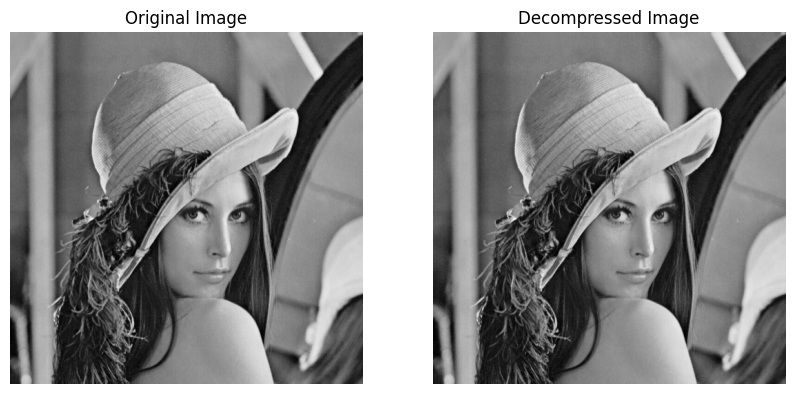

In [2]:
import cv2
import numpy as np
from collections import Counter
import heapq
from tabulate import tabulate
import matplotlib.pyplot as plt

# Helper function to calculate probabilities
def calculate_probabilities(pixel_values):
    total_pixels = len(pixel_values)
    counter = Counter(pixel_values)
    probabilities = {k: v / total_pixels for k, v in counter.items()}
    return probabilities

# Huffman tree node
class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

# Function to generate Huffman codes
def huffman_encoding(probabilities):
    heap = [Node(freq, symbol) for symbol, freq in probabilities.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        left.huff = '0'
        right.huff = '1'

        newNode = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)
        heapq.heappush(heap, newNode)

    huffman_dict = {}
    def generate_huffman_code(node, val=''):
        newVal = val + node.huff

        if node.left is None and node.right is None:
            huffman_dict[node.symbol] = newVal
            return

        generate_huffman_code(node.left, newVal)
        generate_huffman_code(node.right, newVal)

    root = heapq.heappop(heap)
    generate_huffman_code(root)
    return huffman_dict

# Function to print the results in a table
def print_huffman_table(probabilities, huffman_dict):
    table = []
    for symbol, prob in probabilities.items():
        table.append([symbol, prob, huffman_dict[symbol]])

    print(tabulate(table, headers=["Symbol", "Probability", "Huffman Code"], tablefmt="fancy_grid"))

# Function to encode the image using Huffman coding
def encode_image(pixels, huffman_dict):
    encoded_image = ''.join([huffman_dict[pixel] for pixel in pixels])
    return encoded_image

# Function to decode the Huffman encoded data back into the original image
def decode_image(encoded_image, huffman_dict, shape):
    # Reverse the Huffman dictionary to map codes to symbols
    reverse_huffman_dict = {v: k for k, v in huffman_dict.items()}

    decoded_pixels = []
    temp_code = ""

    for bit in encoded_image:
        temp_code += bit
        if temp_code in reverse_huffman_dict:
            decoded_pixels.append(reverse_huffman_dict[temp_code])
            temp_code = ""

    decoded_image = np.array(decoded_pixels).reshape(shape)
    return decoded_image

# Load the image
image_path = 'Lenna_(test_image).png'  # Change this to the path of your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image to a 1D array
pixels = image.flatten()

# Calculate probabilities
probabilities = calculate_probabilities(pixels)

# Apply Huffman encoding
huffman_dict = huffman_encoding(probabilities)

# Print the Huffman codes
print_huffman_table(probabilities, huffman_dict)

# Encode the image
encoded_image = encode_image(pixels, huffman_dict)

# Decode the image to simulate decompression
decoded_image = decode_image(encoded_image, huffman_dict, image.shape)

# Display the original and the decompressed image using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Decompressed Image')
plt.imshow(decoded_image, cmap='gray')
plt.axis('off')

plt.show()
